In [278]:
#importation des bibliotheques 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

In [279]:
# Chargement des données allFeaturesProcessedTraining
data = pd.read_csv("./allFeaturesProcessedTraining.csv")
# Aperçu des données
print("Aperçu des données :")
print(data.head())  # Les 5 premières lignes de mon dataset 


Aperçu des données :
         P1        P2        P3        P4        Y1        Y2        Y3  \
0 -0.519301  1.253719 -0.731967 -1.676458  0.729917 -0.847405 -0.833314   
1  2.627333 -1.639484 -0.908381 -1.680829  0.729974 -0.908666 -1.102826   
2  1.428149 -0.529424 -0.848755 -2.047393  0.697122 -1.100298 -0.574316   
3  1.655412 -0.642192 -0.955687 -1.713301  0.660811 -1.029989 -0.866455   
4  1.329205 -0.438807 -0.842841 -2.050516  0.721010 -0.856181 -1.325744   

         Y4        M1        M2  ...       M18  M19       M20       M21  \
0 -0.435739  1.809490 -0.603755  ...  3.986111    0 -0.320986 -0.226570   
1 -0.102014  1.375954 -0.666759  ...  1.846242    0 -0.320986 -0.053851   
2  0.284447  0.904365  1.324617  ...  0.301660    0 -0.320986 -0.010187   
3  0.103423  1.501101  0.351082  ...  1.817355    0 -0.320986 -0.084635   
4  0.209092  1.467647 -0.544100  ...  0.963291    0 -0.320986  0.132991   

        M22       M23       M24       M25       M26  spontaneity  
0 -0.40606

In [280]:
print("\nLes Statistiques descriptives sont :")
print(data.describe())  # Statistiques pour chaque colonne de mon dataset


Les Statistiques descriptives sont :
               P1          P2          P3          P4          Y1          Y2  \
count  218.000000  218.000000  218.000000  218.000000  218.000000  218.000000   
mean     0.013787    0.022929   -0.035275   -0.026588   -0.006359   -0.024377   
std      1.001651    0.990106    0.973401    0.981318    1.006852    0.982526   
min     -1.252107   -2.067398   -1.160190   -2.135444   -6.040016   -3.879196   
25%     -0.818195   -0.846458   -0.800832   -0.779717   -0.156621   -0.589132   
50%     -0.252357   -0.015424   -0.345137   -0.079997    0.232900   -0.211706   
75%      0.578105    0.790817    0.485808    0.809405    0.562389    0.472243   
max      3.243158    2.010372    2.823911    1.799348    0.729974    2.900462   

               Y3          Y4          M1          M2  ...         M18    M19  \
count  218.000000  218.000000  218.000000  218.000000  ...  218.000000  218.0   
mean    -0.015833   -0.028325    0.038923   -0.004119  ...   -0.005314

In [281]:
# Vérification des colonnes de mon dataset
print("\nLes Colonnes du dataset sont :")
print(data.columns.tolist())


Les Colonnes du dataset sont :
['P1', 'P2', 'P3', 'P4', 'Y1', 'Y2', 'Y3', 'Y4', 'M1', 'M2', 'M3', 'M4', 'M5 ', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M19', 'M20', 'M21', 'M22', 'M23', 'M24', 'M25', 'M26', 'spontaneity']


In [282]:
print("\nLes Informations sur les données sont :")
print(data.info())  # Type et nullité des colonnes


Les Informations sur les données sont :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P1           218 non-null    float64
 1   P2           218 non-null    float64
 2   P3           218 non-null    float64
 3   P4           218 non-null    float64
 4   Y1           218 non-null    float64
 5   Y2           218 non-null    float64
 6   Y3           218 non-null    float64
 7   Y4           218 non-null    float64
 8   M1           218 non-null    float64
 9   M2           218 non-null    float64
 10  M3           218 non-null    float64
 11  M4           218 non-null    float64
 12  M5           218 non-null    float64
 13  M6           218 non-null    float64
 14  M7           218 non-null    float64
 15  M8           218 non-null    float64
 16  M9           218 non-null    float64
 17  M10          218 non-null    float64
 18  M11      

In [283]:
#verification du shape de mon dataset
data.shape

(218, 35)

In [284]:
# Vérification des valeurs nulles existants dans mon dataset
print("\nLa Vérification des valeurs nulles est la suivante:")
print(data.isnull().sum())  # Nombre de valeurs nulles par colonne

# Vérification des doublons existants dans mon dataset
print("\nLe Nombre de lignes en double est le suivant :")
print(data.duplicated().sum())



La Vérification des valeurs nulles est la suivante:
P1             0
P2             0
P3             0
P4             0
Y1             0
Y2             0
Y3             0
Y4             0
M1             0
M2             0
M3             0
M4             0
M5             0
M6             0
M7             0
M8             0
M9             0
M10            0
M11            0
M12            0
M13            0
M14            0
M15            0
M16            0
M17            0
M18            0
M19            0
M20            0
M21            0
M22            0
M23            0
M24            0
M25            0
M26            0
spontaneity    0
dtype: int64

Le Nombre de lignes en double est le suivant :
0


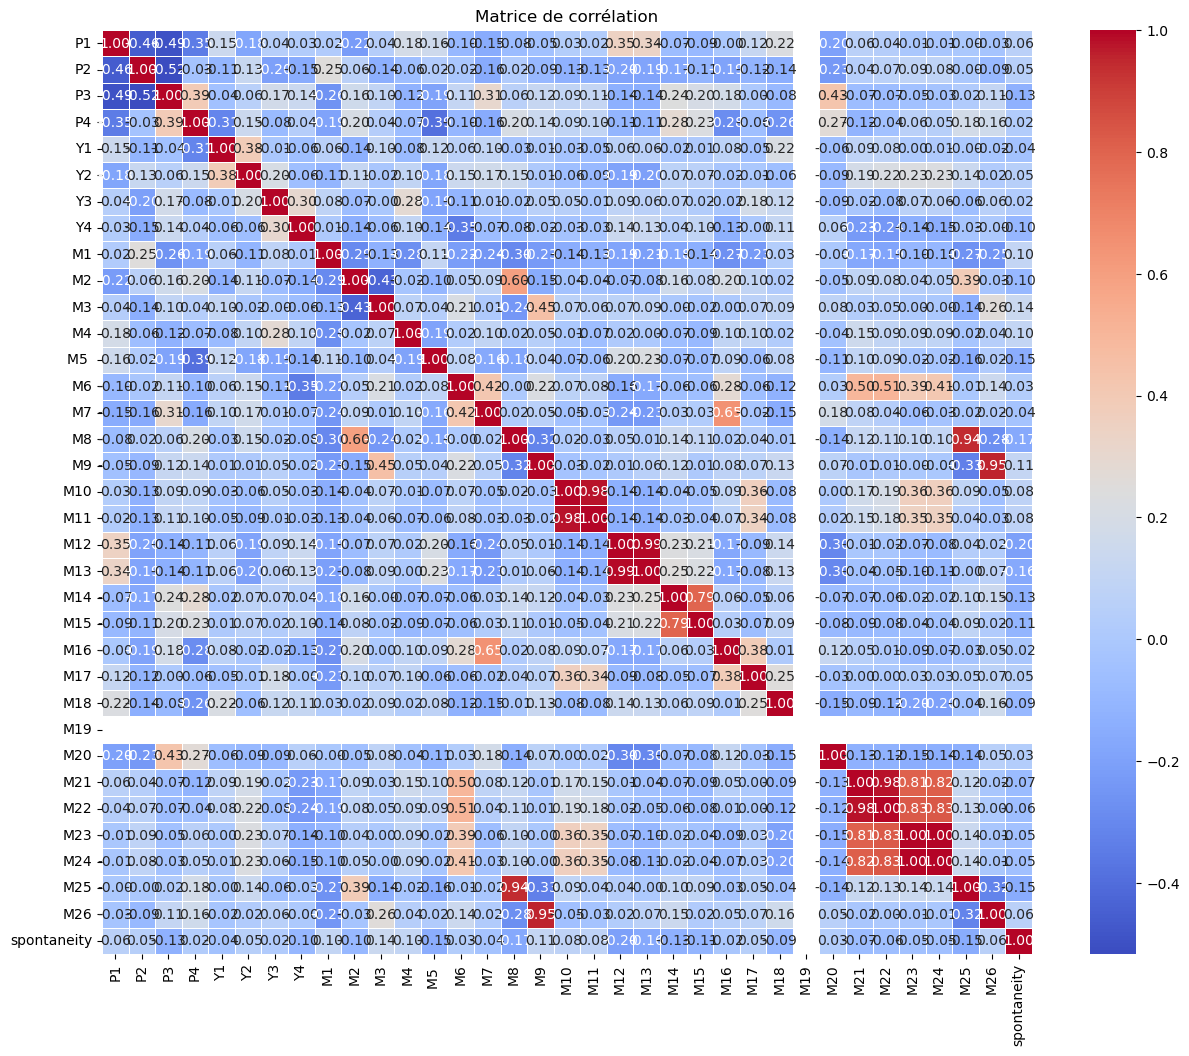

In [285]:

# Calcul de la matrice de corrélation 
correlation_matrix = data.corr()

# Affichage d'une heatmap pour visualiser les corrélations possibles
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()


In [286]:
# d'Apres la courbe la colonne M19 n'a pas de corrélation n'a rien d'interessant sur la décision de la colonne spontaneity
data = data.drop(columns=['M19'])


Colonnes supprimées en raison de corrélations élevées : {'M22', 'M13', 'M25', 'M24', 'M11', 'M26'}
Dimensions des données avant : (218, 34)
Dimensions des données après : (218, 28)


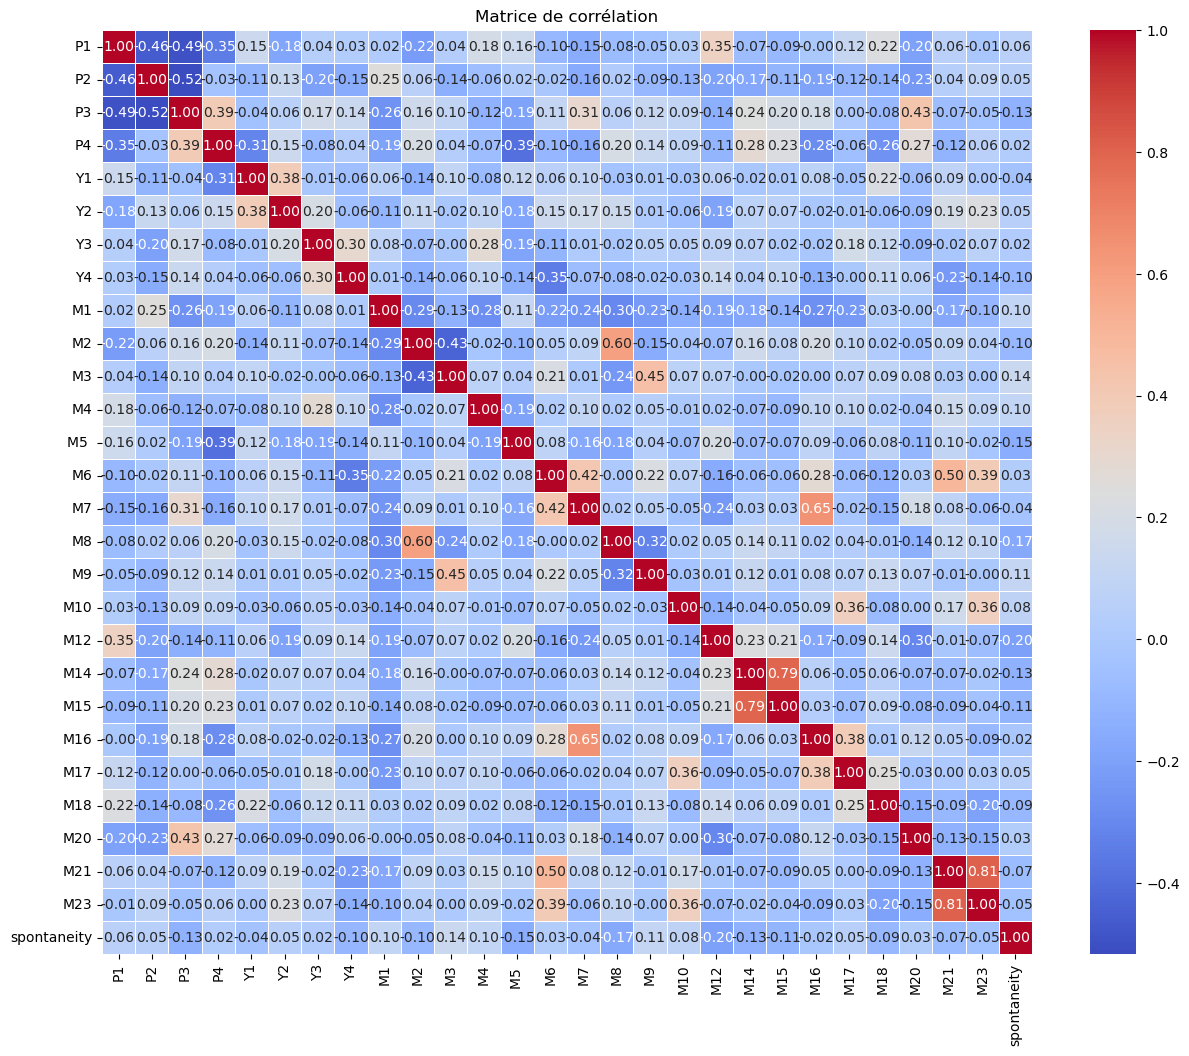

In [287]:
# Extraction des  corrélations absolues supérieures au seuil choisi 
threshold = 0.9
high_correlation = np.where(np.abs(correlation_matrix) > threshold)

# Stockage des colonnes trouvés fortement corrélées
highly_correlated = []
for i in range(len(high_correlation[0])):
    if high_correlation[0][i] != high_correlation[1][i]:  # Exclure les corrélations avec soi-même
        highly_correlated.append((correlation_matrix.index[high_correlation[0][i]],
                                  correlation_matrix.columns[high_correlation[1][i]]))

# Suppression des colonnes corrélées en essayant de garder une seule par groupe
columns_remove = set()
for col1, col2 in highly_correlated:
    if col1 not in columns_remove and col2 not in columns_remove:
        columns_remove.add(col2)  # ici je Garde col1 et je  supprime col2

# Suppression des colonnes corrélées
new_data = data.drop(columns=columns_remove)

# Résultat trouvé
print(f"Colonnes supprimées en raison de corrélations élevées : {columns_remove}")
print(f"Dimensions des données avant : {data.shape}")
print(f"Dimensions des données après : {new_data.shape}")

# Calcul de la nouvelle matrice de corrélation 
new_correlation_matrixx = new_data.corr()

# Affichage d'une heatmap pour la visualisation des corrélations possibles
plt.figure(figsize=(15, 12))
sns.heatmap(new_correlation_matrixx, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()

In [288]:
# Séparation des caractéristiques (X) et de la cible (y)
X = new_data.drop(columns=["spontaneity"])  # Toutes les colonnes sauf la cible
y = new_data["spontaneity"]  # Variable cible

# Affichage des dimensions des données
print("\nLes Dimensions de X (caractéristiques) sont :", X.shape)
print("Les Dimensions de y (cible) sont :", y.shape)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Affichage des dimensions de mon X_train et de mon X_test
print("Les Dimensions de mon X_train est  :", X_train.shape)
print("Les Dimensions de mon X_test est :", X_test.shape)


Les Dimensions de X (caractéristiques) sont : (218, 27)
Les Dimensions de y (cible) sont : (218,)
Les Dimensions de mon X_train est  : (174, 27)
Les Dimensions de mon X_test est : (44, 27)


In [289]:
# Fonction pour calculer le coefficient de corrélation de concordance
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.cov(y_true, y_pred)[0][1]
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred) ** 2)
    return ccc



In [290]:



# Initialisation du modèle de régression linéaire
model_lr = LinearRegression()

# Entraînement du modèle
model_lr.fit(X_train, y_train)

# Prédictions
lr_y_pred_ = model_lr.predict(X_test)

# Calcul des métriques de performance
mse_lr = mean_squared_error(y_test, lr_y_pred_)
mae_lr = mean_absolute_error(y_test, lr_y_pred_)
r2_lr = r2_score(y_test, lr_y_pred_)
pearson_lr = pearsonr(y_test, lr_y_pred_)[0]
ccc_lr = concordance_correlation_coefficient(y_test, lr_y_pred_)

# Affichage des résultats
print("\nÉvaluation Régression Linéaire  :")
print("MSE (Régression Linéaire ):", mse_lr)
print("MAE (Régression Linéaire ):", mae_lr)
print("R² (Régression Linéaire ):", r2_lr)
print("Pearson (Régression Linéaire):", pearson_lr)
print("Coefficient de corrélation de concordance (Régression Linéaire):", ccc_lr)



Évaluation Régression Linéaire  :
MSE (Régression Linéaire ): 0.18848937074132233
MAE (Régression Linéaire ): 0.3061947385260775
R² (Régression Linéaire ): 0.12538546663662697
Pearson (Régression Linéaire): 0.3733343557006385
Coefficient de corrélation de concordance (Régression Linéaire): 0.30171082133285093


In [291]:


# Initialisation du modèle SVM
model_svm = SVR(kernel='rbf')

#Entrainement du modele
model_svm.fit(X_train, y_train)

# Meilleur modèle et évaluation
y_pred_svm = model_svm.predict(X_test)

# Coefficient de concordance
ccc = concordance_correlation_coefficient(y_test, y_pred_svm)

# Affichage des resultats 
print("Coefficient de corrélation de concordance :", ccc)
print("\nÉvaluation SVM  :")
print("MSE (SVM):", mean_squared_error(y_test, y_pred_svm))
print("MAE (SVM):", mean_absolute_error(y_test, y_pred_svm))
print("R² (SVM):", r2_score(y_test, y_pred_svm))
print("Pearson (SVM):", pearsonr(y_test, y_pred_svm)[0])

Coefficient de corrélation de concordance : 0.26252670934361594

Évaluation SVM  :
MSE (SVM): 0.1974207949777547
MAE (SVM): 0.28452392510914887
R² (SVM): 0.0839425279176158
Pearson (SVM): 0.3513006807032009


In [292]:
# Création et entraînement du modèle Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Prédictions sur le jeu de test
y_pred_rf = model_rf.predict(X_test)

# Calcul des métriques de performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf= mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
pearson_rf = pearsonr(y_test, y_pred_rf)[0]
ccc_rf = concordance_correlation_coefficient(y_test, y_pred_rf)

# Affichage des résultats
print("\nÉvaluation Random Forest  :")
print("MSE (Random Forest ):", mse_rf)
print("MAE (Random Forest ):", mae_rf)
print("R² (Random Forest ):", r2_rf)
print("Pearson (Random Forest ):", pearson_rf)
print("Coefficient de corrélation de concordance (Random Forest ):", ccc_rf)



Évaluation Random Forest  :
MSE (Random Forest ): 0.18925779545454544
MAE (Random Forest ): 0.2994318181818182
R² (Random Forest ): 0.12181987872396516
Pearson (Random Forest ): 0.350843130897776
Coefficient de corrélation de concordance (Random Forest ): 0.23382042830778593


In [293]:
# Création et entraînement du modèle XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Prédictions sur le jeu de test
y_pred_xgb = xgb_model.predict(X_test)

# Calcul des métriques de performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
pearson_xgb = pearsonr(y_test, y_pred_xgb)[0]
ccc_xgb = concordance_correlation_coefficient(y_test, y_pred_xgb)

# Affichage des résultats
print("\nÉvaluation XGBoost  :")
print("MSE (XGBoost ):", mse_xgb)
print("MAE (XGBoost ):", mae_xgb)
print("R² (XGBoost ):", r2_xgb)
print("Pearson (XGBoost ):", pearson_xgb)
print("Coefficient de corrélation de concordance (XGBoost):", ccc_xgb)



Évaluation XGBoost  :
MSE (XGBoost ): 0.20769059106464152
MAE (XGBoost ): 0.3293391006474849
R² (XGBoost ): 0.03628937444300251
Pearson (XGBoost ): 0.3135668824007664
Coefficient de corrélation de concordance (XGBoost): 0.27290329378018463


In [294]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialiser le troisième modèle : Gradient Boosting
model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_train)

# Évaluation des performances
mse_gb = mean_squared_error(y_train, y_pred_gb)
mae_gb = mean_absolute_error(y_train, y_pred_gb)
r2_gb = r2_score(y_train, y_pred_gb)

print(f"Erreur Quadratique Moyenne (MSE) : {mse_gb}")
print(f"Erreur Absolue Moyenne (MAE) : {mae_gb}")
print(f"Coefficient de Détermination (R²) : {r2_gb}")

Erreur Quadratique Moyenne (MSE) : 0.006610969910757326
Erreur Absolue Moyenne (MAE) : 0.059644431995817565
Coefficient de Détermination (R²) : 0.9657428226399377


In [295]:
#solution avec ajutement de parametres 
# Initialiser le modèle Gradient Boosting avec des hyperparamètres
model_gb_boosted = GradientBoostingRegressor(
    n_estimators=200,         # Nombre d'arbres
    learning_rate=0.05,       # Taux d'apprentissage
    max_depth=4,              # Profondeur maximale des arbres
    min_samples_split=5,      # Nombre minimum d'échantillons pour une division
    min_samples_leaf=3,       # Nombre minimum d'échantillons par feuille
    max_features="sqrt",      # Nombre maximum de caractéristiques pour les divisions
    subsample=0.8,            # Sous-échantillonnage
    random_state=42           # Répétabilité des résultats
)

# Entraînement du modèle
model_gb_boosted.fit(X_train, y_train)

# Prédictions
y_pred_gb = model_gb_boosted.predict(X_train)


# Évaluation des performances
mse_gb = mean_squared_error(y_train, y_pred_gb)
mae_gb = mean_absolute_error(y_train, y_pred_gb)
r2_gb = r2_score(y_train, y_pred_gb)

print(f"Erreur Quadratique Moyenne (MSE) : {mse_gb}")
print(f"Erreur Absolue Moyenne (MAE) : {mae_gb}")
print(f"Coefficient de Détermination (R²) : {r2_gb}")


Erreur Quadratique Moyenne (MSE) : 0.003025156228595571
Erreur Absolue Moyenne (MAE) : 0.039093018068946925
Coefficient de Détermination (R²) : 0.9843240379454361


In [296]:

import pickle

# Sauvegarde du modèle 
with open('./model_gb_boosted.pkl', 'wb') as f:
    pickle.dump(model_gb_boosted, f)


In [297]:

# Chargement du modèle :
with open('./model_gb_boosted.pkl', 'rb') as f:
    model_gb_loaded = pickle.load(f)

In [301]:

import pandas as pd

# Charger le fichier de test (assurez-vous de connaître le chemin du fichier)
data_test = pd.read_csv('./allFeaturesProcessedTesting.csv')

# suppression de la colonne 'M19'  
if 'M19' in data_test.columns:
    print('La dataset contient bien la colonne M19 donc on va la supprimer')
    data_test = data_test.drop(columns=['M19'])
    
    data_test = data_test.drop(columns=columns_remove)
print("Dimensions de data_test :", data_test.shape)
print("Dimensions de y_test :", y_test.shape)
print("Dimensions de y_train:", y_train.shape)
print("Dimensions de x_test :", X_test.shape)
print("Dimensions de x_train:", X_train.shape)

# Effectuer des prédictions avec le modèle chargé
y_pred_final = model_gb_loaded.predict(data_test)

# Sauvegarde des prédictions dans un fichier CSV
pd.DataFrame(y_pred_final, columns=["ResultatsExamenIAA_EMNAKRAIEM"]).to_csv('ResultatsExamenIAA_EMNAKRAIEM.csv', index=False)

La dataset contient bien la colonne M19 donc on va la supprimer
Dimensions de data_test : (55, 27)
Dimensions de y_test : (44,)
Dimensions de y_train: (174,)
Dimensions de x_test : (44, 27)
Dimensions de x_train: (174, 27)


In [302]:
# vérification du contenu du fichier (est ce qu'il a le même nombre de prédictions que le nombre d’échantillons donnés par le fichier allFeaturesProcessedTesting)

data_original = data_test.shape[0]

data_prédites = y_pred_final.shape[0]

print(f'est ce que le nombre de prédictions a le même nombre que les échantillons ? : {data_original == data_prédites} ')

est ce que le nombre de prédictions a le même nombre que les échantillons ? : True 


In [303]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor


# Charger les données d'entraînement 
X_training = new_data.drop(columns=['spontaneity']) 
y_testing = new_data['spontaneity']  

# Initialiser le modèle Gradient Boosting avec des hyperparamètres optimisés
model_gb_boosted_v2 = GradientBoostingRegressor(
    n_estimators=200,         # Nombre d'arbres
    learning_rate=0.05,       # Taux d'apprentissage
    max_depth=4,              # Profondeur maximale des arbres
    min_samples_split=5,      # Nombre minimum d'échantillons pour une division
    min_samples_leaf=3,       # Nombre minimum d'échantillons par feuille
    max_features="sqrt",      # Nombre maximum de caractéristiques pour les divisions
    subsample=0.8,            # Sous-échantillonnage
    random_state=42           # Répétabilité des résultats
)

# Entraîner le modèle sur toutes les données d'entraînement
model_gb_boosted_v2.fit(X_training, y_testing)

# Effectuer les prédictions sur les données de test
y_pred_test_v2 = model_gb_boosted_v2.predict(data_test)


# Sauvegarde du modèle 
with open('./model_gb_boosted_v2.pkl', 'wb') as f:
    pickle.dump(model_gb_boosted_v2, f)


# Chargement du modèle :
with open('./model_gb_boosted_v2.pkl', 'rb') as f:
    model_gb_loaded = pickle.load(f)

# Sauvegarde des prédictions dans un fichier CSV
pd.DataFrame(y_pred_test_v2, columns=["ResultatsExamenIAA_EMNAKRAIEM_v2"]).to_csv('ResultatsExamenIAA_EMNAKRAIEM_v2.csv', index=False)